# Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Read the dataset
df=pd.read_csv(r"C:\Users\jayan\Downloads\Electric_Vehicle_Population_Data.csv")

In [6]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


# Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [5]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [10]:
#Not including "Eligibility unknown as battery range has not been researched" because we don't the eligibility 
res=df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=="Not eligible due to low battery range"][['Make','Model']]

In [11]:
res

,Make,Model
6,FORD,FUSION
7,AUDI,Q5 E
8,FORD,C-MAX
14,FORD,C-MAX
15,KIA,NIRO
...,...,...
130377,BMW,530E
130385,AUDI,A3
130390,JEEP,WRANGLER
130407,TOYOTA,PRIUS PRIME


In [12]:
#Cars list 
res['Make'].unique()

array(['FORD', 'AUDI', 'KIA', 'BMW', 'TOYOTA', 'JEEP', 'VOLVO', 'PORSCHE',
       'LINCOLN', 'MERCEDES-BENZ', 'MITSUBISHI', 'HYUNDAI', 'MINI',
       'SUBARU', 'LAND ROVER', 'HONDA', 'BENTLEY'], dtype=object)

In [13]:
#Models list
res['Model'].unique()

array(['FUSION', 'Q5 E', 'C-MAX', 'NIRO', 'X5', 'PRIUS PRIME', 'WRANGLER',
       'XC60', 'XC90', 'A3', 'OPTIMA', 'PRIUS PLUG-IN', 'CAYENNE', 'X3',
       '530E', 'AVIATOR', 'C-CLASS', 'OUTLANDER', 'SONATA',
       'GRAND CHEROKEE', 'I8', '330E', 'COUNTRYMAN', 'S60', 'Q5',
       'GLE-CLASS', 'IONIQ', 'PANAMERA', 'GLC-CLASS', 'CORSAIR', 'S90',
       'CROSSTREK', 'V60', 'RANGE ROVER SPORT', 'ACCORD', '740E',
       'RANGE ROVER', 'S-CLASS', '918', 'A7', '745E', 'A8 E',
       'FLYING SPUR', '745LE', 'BENTAYGA'], dtype=object)

# Get all TESLA cars with the model year, and model type made in Bothell City.

In [14]:
fill_df=df[df['Make']=='TESLA']
fill_df[df['City']=='Bothell'][['Make','Model','Model Year']]

C:\Users\jayan\AppData\Local\Temp\ipykernel_12556\1304610820.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fill_df[df['City']=='Bothell'][['Make','Model','Model Year']]


,Make,Model,Model Year
39,TESLA,MODEL 3,2020
217,TESLA,MODEL 3,2022
218,TESLA,MODEL Y,2022
222,TESLA,MODEL 3,2018
292,TESLA,MODEL X,2017
...,...,...,...
129778,TESLA,MODEL 3,2019
129954,TESLA,MODEL 3,2021
129976,TESLA,MODEL S,2014
130295,TESLA,MODEL 3,2022


# Get all the cars that have an electric range of more than 100, and were made after 2015

In [14]:
fill_df=df[df['Electric Range']>100]
fill_df=fill_df[fill_df['Model Year']>2015]

In [15]:
fill_df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
9,5YJSA1CP1D,Kitsap,Bremerton,WA,98312.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,26.0,164768075,POINT (-122.66122 47.56573),PUGET SOUND ENERGY INC,5.303508e+10
11,7SAYGDEF4N,Yakima,Yakima,WA,98908.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,187486883,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10


In [18]:
#cars that have electric range>100 and made after 2015 
fill_df['Make'].unique()

array(['TESLA'], dtype=object)

In [19]:
#car models that have electric range>100 and made after 2015 
fill_df["Model"].unique()

array(['MODEL X', 'MODEL 3', 'MODEL S', 'MODEL Y', 'ROADSTER'],
      dtype=object)

# Draw plots to show the distribution between city and electric vehicle type

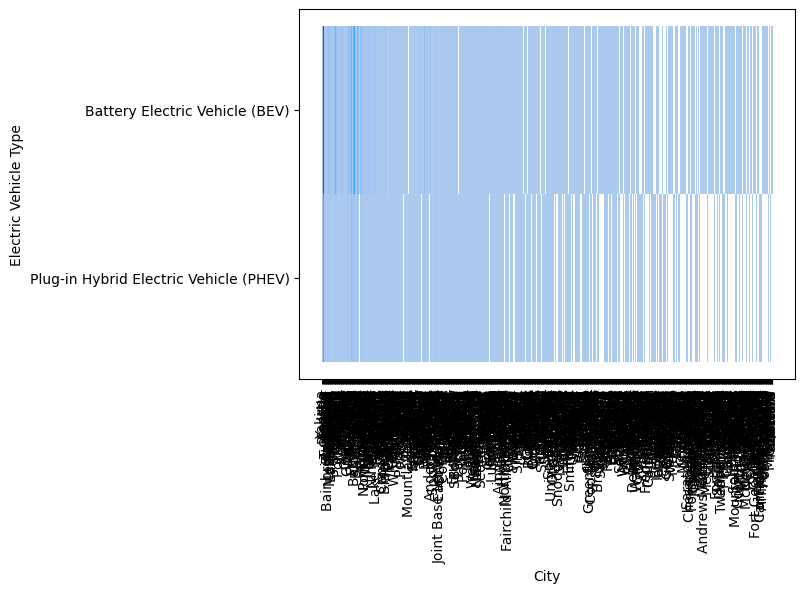

In [4]:
import seaborn as sns
sns.histplot(df,x="City",y='Electric Vehicle Type',kde=True)
plt.xlabel('City')
plt.ylabel('Electric Vehicle Type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
The plot looks chaos as the dataset is huge, so taking a sample of 100 records and plotting the graph as mentioned

In [25]:
fill_df=df.sample(100)

In [26]:
fill_df.shape

(100, 17)

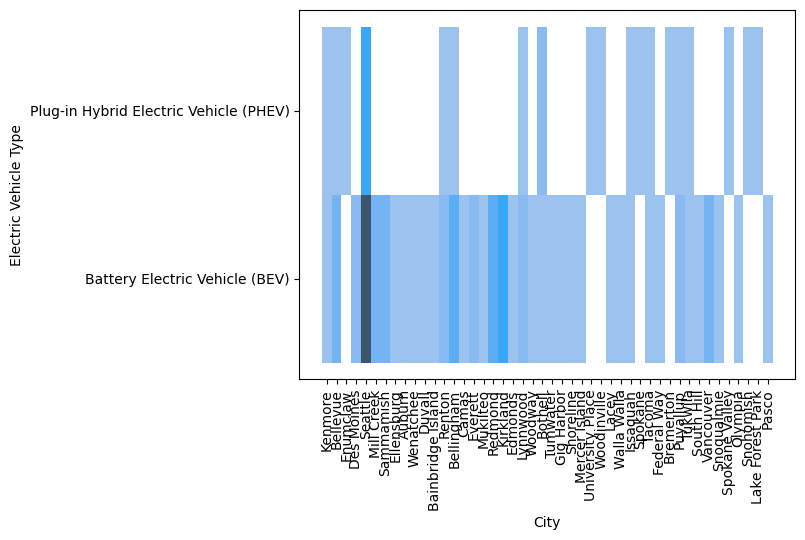

In [27]:
import seaborn as sns
sns.histplot(fill_df,x="City",y='Electric Vehicle Type',kde=True)
plt.xlabel('City')
plt.ylabel('Electric Vehicle Type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
This is not the accurate but for plotting the graph without any chaos took sample of 100 records and plotted.